In [138]:
# import module
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib as plt
%matplotlib inline

In [139]:
# import file
raw_data = pd.read_csv('C:/Users/USER/Desktop/data scient sheet/UCI DATA SET/Custer/Review Rating/google_review_ratings.csv')
# pd.set_option('display.max_columns', None) 
raw_data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [140]:
# find missing value and clean data
raw_data.drop('Unnamed: 25', axis =1, inplace = True)
raw_data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [141]:
raw_data.dropna(inplace=True)

In [142]:
# covert object type to float
raw_data['Category 11'] = raw_data['Category 11'].astype(float)
print(raw_data.dtypes)

User            object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11    float64
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object


In [143]:
data_clean = raw_data.drop('User', axis = 1)
data_clean

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [144]:
# Descriptive statistics 
data_clean.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,...,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,...,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [152]:
# import K-mean
from sklearn.cluster import KMeans
#predict the labels of clusters.
label = kmeans.fit_predict(data_clean)
print(label)

[4 4 4 ... 3 3 1]


In [162]:
# from data set we must divide data to 5 group 
kmeans = KMeans(5)
kmeans.fit(data_clean)

KMeans(n_clusters=5)

In [154]:
data_clean.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24'],
      dtype='object')

In [155]:
features =['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24']

In [156]:
tableA = pd.DataFrame(kmeans.cluster_centers_, columns=features).T
tableA

,0,1,2,3,4
Category 1,1.352485,1.172875,0.943591,2.341945,1.636030
Category 2,2.830136,1.972218,1.488546,2.704251,2.228937
Category 3,2.992302,1.769553,1.965101,2.499713,3.109852
Category 4,3.433633,2.049958,1.934922,2.233730,4.292799
Category 5,4.043846,2.167850,1.994306,2.046302,4.070269
Category 6,3.809893,2.714494,2.232159,1.875887,3.178816
Category 7,3.888166,3.996509,3.495358,1.934878,2.722100
Category 8,2.532976,3.722791,2.307852,1.563507,2.192651
Category 9,2.986858,4.648212,3.193322,1.757418,2.668950
Category 10,2.389734,4.473929,2.918154,1.568810,2.718318


In [157]:
kmeans.cluster_centers_.shape

(5, 24)

In [158]:
# find the maximum values of each row
maxValues =tableA.max(axis = 1)
print(maxValues)

Category 1     2.341945
Category 2     2.830136
Category 3     3.109852
Category 4     4.292799
Category 5     4.070269
Category 6     3.809893
Category 7     3.996509
Category 8     3.722791
Category 9     4.648212
Category 10    4.473929
Category 11    3.654646
Category 12    3.329687
Category 13    3.788031
Category 14    4.744161
Category 15    4.238837
Category 16    1.586334
Category 17    1.763571
Category 18    1.877067
Category 19    2.537333
Category 20    2.132125
Category 21    1.861233
Category 22    4.742974
Category 23    2.532234
Category 24    2.619564
dtype: float64


In [159]:
# find the column name of maximum
# values in every row
maxValueIndex = tableA.idxmax(axis = 1)
 
print("Max values of row are at following columns :")
print(maxValueIndex)

Max values of row are at following columns :
Category 1     3
Category 2     0
Category 3     4
Category 4     4
Category 5     4
Category 6     0
Category 7     1
Category 8     1
Category 9     1
Category 10    1
Category 11    1
Category 12    2
Category 13    2
Category 14    2
Category 15    2
Category 16    3
Category 17    3
Category 18    3
Category 19    3
Category 20    3
Category 21    3
Category 22    4
Category 23    4
Category 24    3
dtype: int64


In [160]:
C = pd.DataFrame(maxValueIndex, columns=['Label'])
C.index.names = ['Catrgory']
C

,Label
Catrgory,
Category 1,3
Category 2,0
Category 3,4
Category 4,4
Category 5,4
Category 6,0
Category 7,1
Category 8,1
Category 9,1


3    8
1    5
4    5
2    4
0    2
Name: Label, dtype: int64
Rating of Catagory :  57


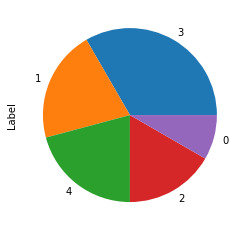

In [161]:
print(C['Label'].value_counts())
C['Label'].value_counts().plot.pie();
print('Rating of Catagory : ', C['Label'].sum())

In [147]:
# Finnally with K-mean fuction we get a data sumary that on upper line we find the most rating is Category 14, 15 (hotels/other lodgings, juice bars)
# we must try to improve with create Centroid and label